# Final Report - Data Science 
## Bachelor in Computer Science / PUCPR

Professor Jean Paul Barddal

`Bruno Thuma` - `bruno.thuma@hotmail.com`

`Gustavo Hammerschmidt` - `gustavocrazy@yahoo.com`

`Leonardo Cleyton` - `leo_cleyton@hotmail.com`

`Lucas Lourenço Dall Agnol` - `lucas_ppl@live.com`

`Victor Marcel Vieira` - `e255270@outlook.com`

`2020`

# Import the libs you need

In [546]:
# Standard libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats # Statistics measurements.
from statsmodels.stats.outliers_influence import variance_inflation_factor # Statistics measurements.
from pylab import rcParams

#########################################################
#########################################################

# Drive Authentication libraries used to connect to the database:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Loading your data

Below, load the data using pandas and make all the necessary data cleansing so that all data types are correct for posterior analysis.

Please change the csv links to your drive database

In [547]:
# LOAD YOUR DATA HERE:

#########################################################
#########################################################

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#########################################################
#########################################################

# LINKS TO THE DATABASE TRAINING, TESTING AND DESCRIPTION FILES:
CSV_TRAIN_FILE_LINK = "https://drive.google.com/file/d/1yyev_-wV1KCuflo71nsPXkrAQCPj2teB/view?usp=sharing"
id_train_set = CSV_TRAIN_FILE_LINK.split('/')[-2]

CSV_TEST_FILE_LINK = "https://drive.google.com/file/d/1TWbp7bYhU5BwjReZEIHt018BBeG043cC/view?usp=sharing"
id_test_set = CSV_TEST_FILE_LINK.split("/")[-2]

DESCRIPTION_FILE_LINK = "https://drive.google.com/file/d/1qblVwABXSrtSolBMAUkCucZ0i5UKyvak/view?usp=sharing"
id_description = DESCRIPTION_FILE_LINK.split("/")[-2]

#########################################################
#########################################################

# DOWNLOADING THE TRAIN FILE ON MEMORY AND OPENING IT WITH PANDAS:
downloaded = drive.CreateFile({'id':id_train_set})
downloaded.GetContentFile('train_file.csv')  

df = pd.read_csv('train_file.csv', na_values=-9999.0, sep=',', error_bad_lines=False)
df["SAFRA"] = "TRAIN"

#########################################################
#########################################################

# DOWNLOADING THE TEST FILE ON MEMORY AND OPENING IT WITH PANDAS:
downloaded_t = drive.CreateFile({'id':id_test_set})
downloaded_t.GetContentFile('test_file.csv')  

df_test = pd.read_csv('test_file.csv', na_values=-9999.0, sep=',', error_bad_lines=False)
df_test["SAFRA"] = "TEST"

#########################################################
#########################################################

# DOWNLOADING THE DESCRIPTION FILE ON MEMORY AND OPENING IT WITH PANDAS:
downloaded = drive.CreateFile({'id':id_description})
downloaded.GetContentFile('description_file.xlsx') 

df_description = pd.DataFrame(pd.read_excel("description_file.xlsx")) 

#########################################################
#########################################################

In [548]:
# CLEAN AND TREAT THE DATA HERE:

In [549]:
# SETTING ASSESSMENT FUNCTIONS TO CHECK THE DATABASE STATUS THROUGHOUT EXECUTION ON THE FLY:

#########################################################
#########################################################

# GRAB THE COLUMNS' NAME:
col_names = lambda x: "\n".join(["Coluna "+str(i)+": "+str(x.columns[i]) for i in range(0, len(x.columns))])

#########################################################
#########################################################

# NUMBER OF LINES IN DATAFRAME:
n_lines = lambda x: x.shape[0]

# NUMBER OF COLUMNS IN DATAFRAME:
n_columns = lambda x: x.shape[1]

#########################################################
#########################################################

# REMOVE COLUMNS FROM DATAFRAME:
remove_columns = lambda x, columns: x.drop(labels=columns, axis=1, inplace=True)

def remove_from_dataframe(df, columns):
    for i in [col_names(df).find(x) for x in columns]:
        if i == -1:
            return "Columns weren't found!" 
    remove_columns(df, columns)
    return "Columns removed!"

#########################################################
#########################################################

# SPECIFICATIONS ON COLUMNS WITH NON MULTIVALUES:
def specifications(df, multivalue=False):
    names, values_of_name = [x for x in df.columns], [df[x].unique() for x in df.columns]
    n_values = [ (str(x) if len(x) < 15 else 'multivalue') for x in values_of_name] 
    ret, ret2 = [ ("Name: "+names[x]+", values = "+n_values[x] if n_values[x]!='multivalue' else "") for x in range(0, len(names))], [ ("Name: "+names[x]+", values = "+n_values[x]) for x in range(0, len(names))]
    return ("\n".join(filter(lambda x : x != "", ret)) if not multivalue else "\n".join(ret2))

#########################################################
#########################################################

# Number of missing values by column:
missing_values = lambda x: pd.DataFrame(np.array([x[i].isna().sum() for i in df.columns]),index=df.columns).T

#########################################################
#########################################################

#Column name description:
description = lambda name: df_description[df_description["FINALNOME"] == str(name)].T.iloc[1, 0]

#########################################################
#########################################################


In [550]:
# REMOÇÃO DE COLUNAS:
remove_from_dataframe(df, {"ORIENTACAO_SEXUAL", "RELIGIAO"})
remove_from_dataframe(df_description, {'Unnamed: 2'})

# Remoção de valores descritivos iguais a na:
df_description = df_description[df_description['DESCRIÇÃO'].notna()]

In [551]:
# use as many code and text cells you wish

# Univariate data analysis

In this section, you should perform univariate data analysis on at least 20 variables. 

In the end, you should describe the main variables that are of your interest, and these should be accounted for in the next sections of the report.
The definition of each variable chosen should be clarified, so arbitrary selections are **not** accepted at this point.

For each variable plotted, make sure you determine the following:
1. The distribution of the data (gaussian, binomial, exponential, etc)
2. Skew
3. Kurtosis
4. Mean, standard deviation, and what they stand for in the context of the dataset

Regardless of the type of the variable being analyzed, make sure you plot it correctly. For instance, make sure scatterplots are not used for categorical data and so forth.

In [552]:
# place as many cells to plot the visualizations, 
# as well as to describe the main findings.

## Univariate - Funções

In [604]:
# SETTING ASSESSMENT FUNCTIONS TO CHECK THE DATABASE THROUGHOUT EXECUTION ON THE FLY:

#########################################################
#########################################################

# GET REPARTITION OF DATAFRAME BY DIVISION AS MENCIONED ON DICTIONARY.XLSX:
# WARNING: 'SAFRA' COLUMN WAS NOT FOUND IN DATAFRAME, THEREFORE, WAS REMOVED. 
#    -> USE THE FOLLOWING CODE TO CHECK THE INEXISTANCE:  print(col_names(df).find("SAFRA"))
#    -> OUR TEAM HAS CHECKED THE DICTIONARY FOR EXPLANANTION: APPARENTLY, SAFRA REFERS TO THE SAMPLE SET IT WAS OBTAINED:
#    -> IN THIS CASE, MEANING THAT THE SET IS EITHER 'TRAIN' OR 'TEST'.
def splitted_df_block(df, block_index):
    names = dict()
    names["basicas"], names["renda"], names["empresarial"], names["familiar"], names["regional"] = 0,1,2,3,4
    indexes = [["HS_CPF","SAFRA","TEMPOCPF", "DISTCENTROCIDADE", "DISTZONARISCO","QTDENDERECO", "QTDEMAIL", "QTDCELULAR",
                "CELULARPROCON", "QTDFONEFIXO", "TELFIXOPROCON", "TARGET"],  # Colunas básicas;
                ["ESTIMATIVARENDA","QTDDECLARACAOISENTA","QTDDECLARACAO10","QTDDECLARACAOREST10","QTDDECLARACAOPAGAR10",
                  "RESTITUICAOAGENCIAALTARENDA","BOLSAFAMILIA","ANOSULTIMARESTITUICAO","ANOSULTIMADECLARACAO","ANOSULTIMADECLARACAOPAGAR"], # Renda;
                ["INDICEEMPREGO", "PORTEEMPREGADOR", "SOCIOEMPRESA", "FUNCIONARIOPUBLICO", "SEGMENTACAO",
                  "SEGMENTACAOCOBRANCA", "SEGMENTACAOECOM", "SEGMENTACAOFIN", "SEGMENTACAOTELECOM"], # Empresarial;
                ["QTDPESSOASCASA","MENORRENDACASA","MAIORRENDACASA","SOMARENDACASA","MEDIARENDACASA","MAIORIDADECASA",
                  "MENORIDADECASA","MEDIAIDADECASA","INDICMENORDEIDADE","COBRANCABAIXOCASA","COBRANCAMEDIOCASA","COBRANCAALTACASA",
                  "SEGMENTACAOFINBAIXACASA","SEGMENTACAOFINMEDIACASA","SEGMENTACAOALTACASA","BOLSAFAMILIACASA","FUNCIONARIOPUBLICOCASA"], #Familiar;
                [
                  "IDADEMEDIACEP","PERCENTMASCCEP","PERCENTFEMCEP","PERCENTANALFABETOCEP","PERCENTPRIMARIOCEP","PERCENTFUNDAMENTALCEP","PERCENTMEDIOCEP",
                  "PERCENTSUPERIORCEP","PERCENTMESTRADOCEP","PERCENTDOUTORADOCEP","PERCENTBOLSAFAMILIACEP","PERCENTFUNCIONARIOPUBLICOCEP","MEDIARENDACEP","PIBMUNICIPIO",
                  "QTDUTILITARIOMUNICIPIO","QTDAUTOMOVELMUNICIPIO","QTDCAMINHAOMUNICIPIO","QTDCAMINHONETEMUNICIPIO","QTDMOTOMUNICIPIO","PERCENTPOPZONAURBANA","IDHMUNICIPIO" ] # Regional.
    ]
    return df[indexes[block_index]] if not isinstance(block_index, str) else df[indexes[names[block_index.lower()]]]

#########################################################
#########################################################

# PLOT ANALYSIS FUNCTIONS:
standard_plot_functions = [
                           
      ['distplot', lambda df, var, ignore: sns.distplot(df[var].dropna())],
      ['countplot', lambda df, var, ignore: sns.countplot(df[var].dropna())],
      ['boxplot', lambda df, var, var2: sns.boxplot(df[var].dropna()) if var2 == None else sns.boxplot(x=df[var].dropna(), y=df[var2].dropna())],
      ['violinplot', lambda df, var, var2: sns.violinplot(df[var].dropna()) if var2 == None else sns.violinplot(x=df[var].dropna(), y=df[var2].dropna())],
      ['hist', lambda df, var, ignore: df[var].hist()],
      ['pizza', lambda df, var, ignore: df[var].dropna().value_counts().plot(kind='pie', autopct='%1.1f%%')],
      ['distplot_kne', lambda df, var, ignore: sns.distplot(df[var].dropna(), kde=False, bins=10)],
      ['describe', lambda df, ignore, ignore2: df.describe()], 
      ['corr', lambda df, ignore, ignore2: df.corr()], 
      ['head', lambda df, var, limit: df[var].head(limit)],
      ['jointplot', lambda df, var, var2: sns.jointplot(df[var], df[var2], kind='kde')],
      ['scatterplot', lambda df, var, var2: sns.scatterplot(df[var], df[var2])],
      ['swarmplot',  lambda df, var, var2: sns.swarmplot(df[var], df[var2])],
      ['bubbleplot', lambda df, var, var2: plt.scatter(df[var], df[var2], s=np.random.rand(n_lines(df))*1000, alpha=0.5)],
      ['barplot', lambda df, var, var2: sns.barplot(df[var], df[var2], palette="Blues_d")]

]

#########################################################
#########################################################

# PLOT ANALYSIS FUNCTIONS:
additional_plot_functions = [
                             
    ['scatterplot_op', lambda df, var, var2, s_, alpha_: sns.scatterplot(df[var], df[var2], s=s_, alpha=alpha_)],
    ['stripplot', lambda df, var, var2, jitter_, size_: sns.stripplot(df[var], df[var2], jitter=jitter_, size=size_)],
    ['kdeplot', lambda df, var, var2, shade_, ignore: sns.kdeplot(df[var], df[var2], shade=shade_)]
    
]


final_plot_functions = [
                  
    ['scatterplot_f', lambda df, var, var2: sns.scatterplot(df[var], df[var2], marker='D', hue=df[var2], palette="magma", size=20, edgecolor="gray", alpha=0.7)],
    ['stripplot_f', lambda df, var, var2: sns.stripplot(df[var], df[var2],hue=df[var], palette="inferno", size=12, marker="o", edgecolor="gray", jitter=0.4, alpha=0.25)],
    ['scatterplot_f2', lambda df, var, var2: sns.scatterplot(df[var], df[var2], marker='D', hue=df[var2], palette="viridis", size=20, edgecolor="gray", alpha=0.7)] 

]


distribution_arr, skew_arr, kurtosis_arr = ['Gaussian', 'Binomial', 'Exponential', 'Beta'], ['Positive', 'Negative', 'Zero'], ['Platykurtic', 'Mesokurtic', 'Leptocurtic']

def info_plot(df, name, distribution, skew, kurtosis, more):
    global distribution_arr, skew_arr, kurtosis_arr   
    print('\nDistribution: {}\nSkew: {}\nKurtosis: {}\nMean: {}\nStd: {}\nMore Info: {}'.format(distribution_arr[distribution],skew_arr[skew],kurtosis_arr[kurtosis],
                                                                                                df[name].mean(), df[name].std(), more))

#########################################################
#########################################################

# BRIDGE IN-BETWEEN NAME-FUNCTIONALITY CONNECTION:
types = dict()
for match in standard_plot_functions:
    types[match[0]] = match[1]

for match in additional_plot_functions:
    types[match[0]] = match[1]
  
for match in final_plot_functions:
    types[match[0]] = match[1]

#########################################################
#########################################################


# PLOT ANALYSIS FUNCTION:
# Easy caller to plot in one line:
def plot(df, type_, var1=None, var2=None, options=[], title=None, x_axis_name=None, y_axis_name=None, darkgrid=True, is_subplot=False,
         subplot_index=(), final_subplot=False, info=(), show_info=False, define_size=False, sizeP=()):
    
    global types, SUBPLOT_COUNTER
    print("\n")
    call_names = [i[0] for i in standard_plot_functions]
    call_names.append(i[0] for i in additional_plot_functions)
    
    if darkgrid:
        sns.set(style='darkgrid')
    
    if is_subplot:
        plt.subplot(*subplot_index)
    
    if define_size:
        rcParams['figure.figsize'] = sizeP
    else:
        rcParams['figure.figsize'] = (6,4)

    if type_ in ['scatterplot_op', 'stripplot', 'kdeplot']:
        types[type_](df, var1, var2, options[0], None) if type_ == 'kdeplot' else types[type_](df, var1, var2, options[0], options[1])

    elif type_ in ['describe', 'corr']:
        return types[type_](df, None, None)

    elif type_ in [i[0] for i in standard_plot_functions]:
        types[type_](df, var1, var2)

    # ADD MORE OPTIONS 
    elif type_ in ['scatterplot_f', 'stripplot_f', 'scatterplot_f2']:
        types[type_](df, var1, var2,*options)

    elif type_ not in call_names:
        return 'Type not found!'

    plt.xlabel(x_axis_name if x_axis_name else "the X axis")
    plt.ylabel(y_axis_name if y_axis_name else "the Y axis")
    plt.title(title if title else '', loc="left")   

    if final_subplot:
        plt.show()
        if show_info:
            info_plot(df, *info)
    else:
        plt.show()
        if show_info:
            info_plot(df, *info)

#########################################################
#########################################################

# GET ONLY 'SET-VALUED' COLUMN NAMES:
non_multivalued_vars = lambda df: [x for x in df.columns if len(df[x].unique()) < 15]
df_snippet = lambda df: pd.DataFrame(np.array([str(df[x].unique()) if len(df[x].unique()) < 15 else 'multivalue' for x in df.columns]),index=df.columns).T

#########################################################
#########################################################


## Univariate - Separação do df

In [554]:
# if you realize you need to further clean your data here, there is no problem, 
# yet, make sure you are describing the entire process and the rationale 
# behind your choices here

# REPARTIONING OF THE DAFRAME BY BLOCKS RELATED TO DICTIONARY:
df_basicas, df_renda = splitted_df_block(df, "basicas"), splitted_df_block(df, "renda")
df_empresarial, df_familiar = splitted_df_block(df, "empresarial"), splitted_df_block(df, "familiar")
df_regional = splitted_df_block(df, "regional")


# CHECKING NUMBER OF NON-MULTIVALUED COLUMNS ON EACH PARTITION:
occurrences = lambda df, df_block: len([x for x in non_multivalued_vars(df) if x in df_block.columns])

print("Non-multivalued vars in df_basicas:", occurrences(df, df_basicas), 
      "\nNon-multivalued vars in df_renda:", occurrences(df, df_renda),
      "\nNon-multivalued vars in df_empresarial:", occurrences(df, df_empresarial),
      "\nNon-multivalued vars in df_familiar:", occurrences(df, df_familiar),
      "\nNon-multivalued vars in df_regional:", occurrences(df, df_regional))

Non-multivalued vars in df_basicas: 4 
Non-multivalued vars in df_renda: 2 
Non-multivalued vars in df_empresarial: 9 
Non-multivalued vars in df_familiar: 10 
Non-multivalued vars in df_regional: 1


## Univariate - Display de colunas com sets de valores

In [555]:
df_snippet(df)

,HS_CPF,TEMPOCPF,DISTCENTROCIDADE,DISTZONARISCO,QTDENDERECO,QTDEMAIL,QTDCELULAR,CELULARPROCON,QTDFONEFIXO,TELFIXOPROCON,INDICEEMPREGO,PORTEEMPREGADOR,SOCIOEMPRESA,FUNCIONARIOPUBLICO,SEGMENTACAO,SEGMENTACAOCOBRANCA,SEGMENTACAOECOM,SEGMENTACAOFIN,SEGMENTACAOTELECOM,QTDPESSOASCASA,MENORRENDACASA,MAIORRENDACASA,SOMARENDACASA,MEDIARENDACASA,MAIORIDADECASA,MENORIDADECASA,MEDIAIDADECASA,INDICMENORDEIDADE,COBRANCABAIXOCASA,COBRANCAMEDIOCASA,COBRANCAALTACASA,SEGMENTACAOFINBAIXACASA,SEGMENTACAOFINMEDIACASA,SEGMENTACAOALTACASA,BOLSAFAMILIACASA,FUNCIONARIOPUBLICOCASA,IDADEMEDIACEP,PERCENTMASCCEP,PERCENTFEMCEP,PERCENTANALFABETOCEP,PERCENTPRIMARIOCEP,PERCENTFUNDAMENTALCEP,PERCENTMEDIOCEP,PERCENTSUPERIORCEP,PERCENTMESTRADOCEP,PERCENTDOUTORADOCEP,PERCENTBOLSAFAMILIACEP,PERCENTFUNCIONARIOPUBLICOCEP,MEDIARENDACEP,PIBMUNICIPIO,QTDUTILITARIOMUNICIPIO,QTDAUTOMOVELMUNICIPIO,QTDCAMINHAOMUNICIPIO,QTDCAMINHONETEMUNICIPIO,QTDMOTOMUNICIPIO,PERCENTPOPZONAURBANA,IDHMUNICIPIO,ESTIMATIVARENDA,QTDDECLARACAOISENTA,QTDDECLARACAO10,QTDDECLARACAOREST10,QTDDECLARACAOPAGAR10,RESTITUICAOAGENCIAALTARENDA,BOLSAFAMILIA,ANOSULTIMARESTITUICAO,ANOSULTIMADECLARACAO,ANOSULTIMADECLARACAOPAGAR,TARGET,SAFRA
0,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,[ 0. 1. nan],multivalue,[ 0. 1. nan],[ 0. 4. 6. 1. 5. 3. 2. nan],[ 0. 1. 2. 3. 4. nan],[ 0. 1. nan],[ 0. 1. nan],[ 0. 1. 3. 2. 4. 5. nan],[ 0. 3. 1. 4. nan 2. 5.],[ 0. 1. nan 5. 2. 4. 3.],[ 0. 1. 2. nan 3. 4. 5.],[ 0. 3. 1. 2. 4. nan 5.],[ 2. nan 3. 4. 5. 6. 9. 7. 8. 10.],multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,[ 0. nan 1.],[ 0. nan 1.],[ 0. nan 1.],[ 0. nan 1.],[ 0. nan 1.],[ 0. nan 1.],[ 0. nan 1.],[ 1. nan 0.],[ 0. nan 1.],multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,[ 0. nan 1. 2. 3. 7. 5. 4. 6. 8.],multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,[ 0. 1. nan],[ 0. 1. nan],multivalue,multivalue,multivalue,[0. 1.],['TRAIN']


## Univariate - Variável 1

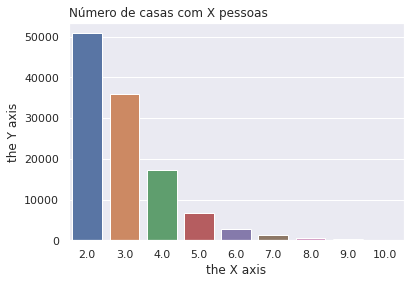


Distribution: Gaussian
Skew: Positive
Kurtosis: Mesokurtic
Mean: 2.994602250645571
Std: 1.2306877807879248
More Info: 
		""A informação foi selecionada como indicativo de pessoas por casa.""



In [556]:
why = '\n\t\t""A informação foi selecionada como indicativo de pessoas por casa.""\n'
plot(df, 'countplot', 'QTDPESSOASCASA', title='Número de casas com X pessoas', info=('QTDPESSOASCASA', 0,0,1,why), show_info=True)

## Univariate - Variável 2

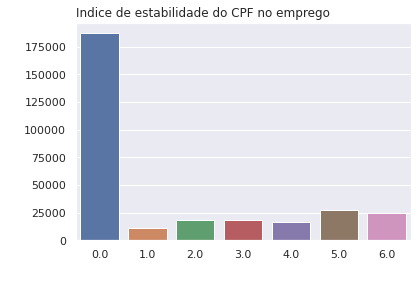


Distribution: Gaussian
Skew: Positive
Kurtosis: Leptocurtic
Mean: 1.4945635689889358
Std: 2.1520671583443103
More Info: 
		""A informação foi selecionada como indicativo de possibilidade de demissão ou segurança de recebimento de uma renda "fixa".""



In [607]:
why = '\n\t\t""A informação foi selecionada como indicativo de possibilidade de demissão ou segurança de recebimento de uma renda "fixa".""\n'
plot(df, 'countplot', "INDICEEMPREGO", title=description('INDICEEMPREGO'), y_axis_name=' ', x_axis_name=' ', info=('INDICEEMPREGO', 0,0,2,why), show_info=True) 

## Univariate - Variável 3

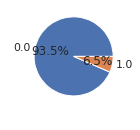

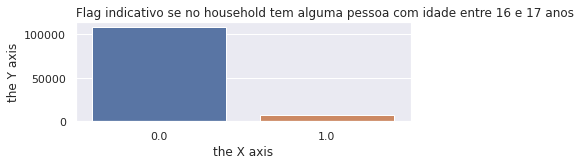


Distribution: Binomial
Skew: Positive
Kurtosis: Mesokurtic
Mean: 0.06496299303042603
Std: 0.24646161399000016
More Info: 
		""A informação foi selecionada como um indício de que há um integrante na família que não gera renda possivelmente.""



In [558]:
why = '\n\t\t""A informação foi selecionada como um indício de que há um integrante na família que não gera renda possivelmente.""\n'
plot(df, 'pizza', 'INDICMENORDEIDADE', is_subplot=True, subplot_index=(2,1,1), y_axis_name=' ', x_axis_name=' ') 
plot(df, 'countplot', 'INDICMENORDEIDADE', title=description('INDICMENORDEIDADE'), is_subplot=True, subplot_index=(2,1,2), final_subplot=True, info=('INDICMENORDEIDADE', 1,0,1,why), show_info=True)

## Univariate - Variável 4

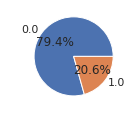

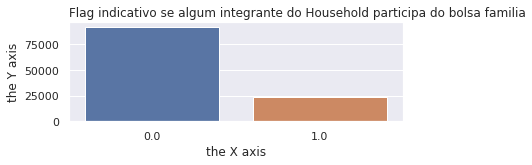


Distribution: Binomial
Skew: Positive
Kurtosis: Mesokurtic
Mean: 0.20632357132370088
Std: 0.40466723304277713
More Info: 
		""O gráfico foi selecionado devido ao plano Bolsa Família ser um indicativo de baixa renda e número de pessoas por caso alto.""



In [559]:
why = '\n\t\t""O gráfico foi selecionado devido ao plano Bolsa Família ser um indicativo de baixa renda e número de pessoas por caso alto.""\n'
plot(df, 'pizza', 'BOLSAFAMILIACASA', is_subplot=True, subplot_index=(2,1,1), y_axis_name=' ', x_axis_name=' ') 
plot(df, 'countplot', 'BOLSAFAMILIACASA', title=description('BOLSAFAMILIACASA'), is_subplot=True, subplot_index=(2,1,2), final_subplot=True, info=('BOLSAFAMILIACASA', 1,0,1,why), show_info=True)

## Univariate - Variável 5

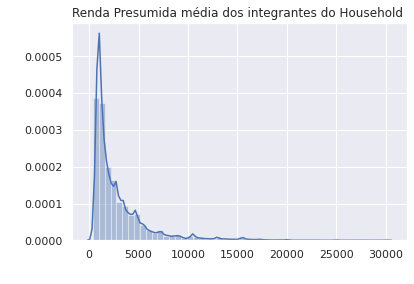


Distribution: Gaussian
Skew: Positive
Kurtosis: Leptocurtic
Mean: 2904.787539849147
Std: 2989.041412379359
More Info: 
		""A informação foi selecionada como indicativo de renda média por household.""



In [560]:
why = '\n\t\t""A informação foi selecionada como indicativo de renda média por household.""\n'
plot(df, 'distplot', "MEDIARENDACASA", title=description('MEDIARENDACASA'), y_axis_name=' ', x_axis_name=' ', info=('MEDIARENDACASA', 0,0,2,why), show_info=True) 

## Univariate - Variável 6

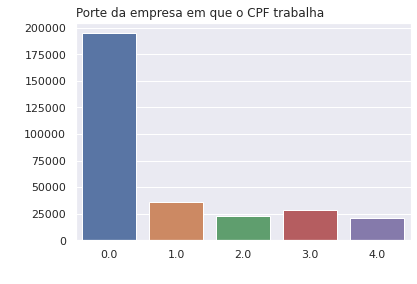


Distribution: Gaussian
Skew: Positive
Kurtosis: Leptocurtic
Mean: 0.8319354881249094
Std: 1.3023443785317785
More Info: 
		""A informação foi selecionada como indicativo de quantos CPFs por empresa estão no ranking de 0 a 4.""



In [561]:
why = '\n\t\t""A informação foi selecionada como indicativo de quantos CPFs por empresa estão no ranking de 0 a 4.""\n'
plot(df, 'countplot', "PORTEEMPREGADOR", title=description('PORTEEMPREGADOR'), y_axis_name=' ', x_axis_name=' ', info=('PORTEEMPREGADOR', 0,0,2,why), show_info=True) 

## Univariate - Variável 7

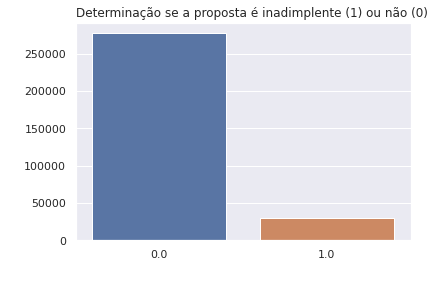


Distribution: Gaussian
Skew: Positive
Kurtosis: Leptocurtic
Mean: 0.09640847751596937
Std: 0.29515109089178676
More Info: 
		""A informação foi selecionada como indicativo de proposta inadimplente ou não.""



In [562]:
why = '\n\t\t""A informação foi selecionada como indicativo de proposta inadimplente ou não.""\n'
plot(df, 'countplot', "TARGET", title=description('TARGET'), y_axis_name=' ', x_axis_name=' ', info=('TARGET', 0,0,2,why), show_info=True) 

## Univariate - Variável 8

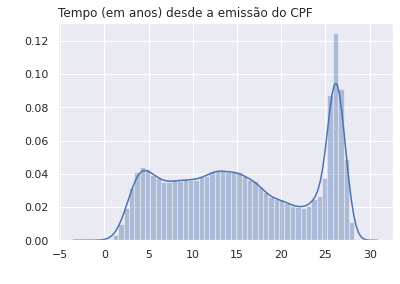


Distribution: Gaussian
Skew: Negative
Kurtosis: Leptocurtic
Mean: 15.736359878792248
Std: 7.988362018707247
More Info: 
		""A informação foi selecionada como indicativo de quanto tempo o CPF já teve para declarar imposto.""



In [563]:
why = '\n\t\t""A informação foi selecionada como indicativo de quanto tempo o CPF já teve para declarar imposto.""\n'
plot(df, 'distplot', "TEMPOCPF", title=description('TEMPOCPF'), y_axis_name=' ', x_axis_name=' ', info=('TEMPOCPF', 0,1,2,why), show_info=True)

## Univariate - Variável 9

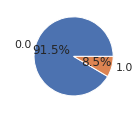

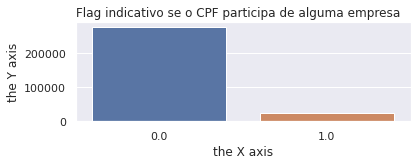


Distribution: Gaussian
Skew: Positive
Kurtosis: Leptocurtic
Mean: 0.08483997309807335
Std: 0.2786438731331874
More Info: 
		""A informação foi selecionada como um indício se o CPF possuí uma participação em empresas.""



In [564]:
why = '\n\t\t""A informação foi selecionada como um indício se o CPF possuí uma participação em empresas.""\n'
plot(df, 'pizza', 'SOCIOEMPRESA', is_subplot=True, subplot_index=(2,1,1), y_axis_name=' ', x_axis_name=' ') 
plot(df, 'countplot', 'SOCIOEMPRESA', title=description('SOCIOEMPRESA'), is_subplot=True, subplot_index=(2,1,2), final_subplot=True, info=('SOCIOEMPRESA', 0,0,2,why), show_info=True)

## Univariate - Variável 10

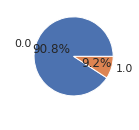

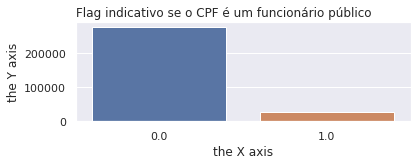


Distribution: Gaussian
Skew: Positive
Kurtosis: Leptocurtic
Mean: 0.0915588611517717
Std: 0.2884026877675264
More Info: 
		""A informação foi selecionada como um indício se o CPF é funcionário público.""



In [565]:
why = '\n\t\t""A informação foi selecionada como um indício se o CPF é funcionário público.""\n'
plot(df, 'pizza', 'FUNCIONARIOPUBLICO', is_subplot=True, subplot_index=(2,1,1), y_axis_name=' ', x_axis_name=' ') 
plot(df, 'countplot', 'FUNCIONARIOPUBLICO', title=description('FUNCIONARIOPUBLICO'), is_subplot=True, subplot_index=(2,1,2), final_subplot=True, info=('FUNCIONARIOPUBLICO', 0,0,2,why), show_info=True)

## Univariate - Variável 11

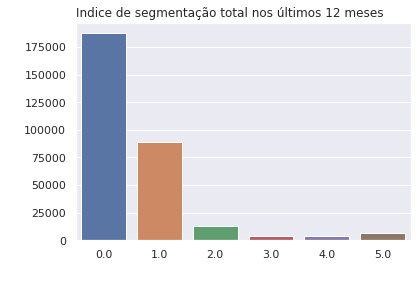


Distribution: Gaussian
Skew: Positive
Kurtosis: Mesokurtic
Mean: 0.5758429929712123
Std: 1.0010992661553337
More Info: 
		""A informação foi selecionada como indicativo de segmentação.""



In [566]:
why = '\n\t\t""A informação foi selecionada como indicativo de segmentação.""\n'
plot(df, 'countplot', "SEGMENTACAO", title=description('SEGMENTACAO'), y_axis_name=' ', x_axis_name=' ', info=('SEGMENTACAO', 0,0,1,why), show_info=True) 

## Univariate - Variável 12

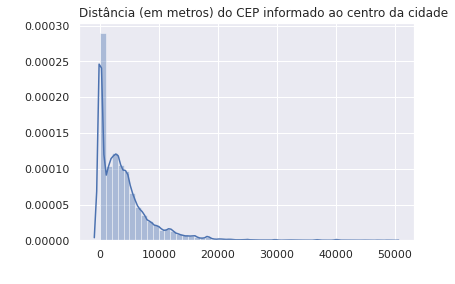


Distribution: Gaussian
Skew: Positive
Kurtosis: Mesokurtic
Mean: 4037.8931249650354
Std: 4813.157985541082
More Info: 
		""A informação foi selecionada como indicativo de proximidade ao centro, pois pode indicar um maior custo de vida.""



In [567]:
why = '\n\t\t""A informação foi selecionada como indicativo de proximidade ao centro, pois pode indicar um maior custo de vida.""\n'
plot(df, 'distplot', "DISTCENTROCIDADE", title=description('DISTCENTROCIDADE'), y_axis_name=' ', x_axis_name=' ', info=('DISTCENTROCIDADE', 0,0,1,why), show_info=True) 

## Univariate - Variável 13

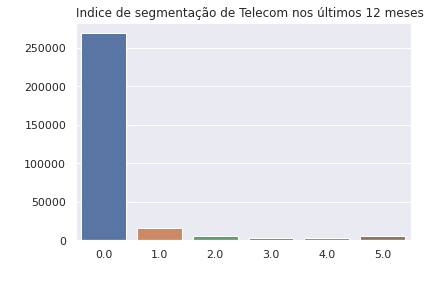


Distribution: Gaussian
Skew: Positive
Kurtosis: Leptocurtic
Mean: 0.26120913610528673
Std: 0.8971520067605976
More Info: 
		""A informação foi selecionada como indicativo de segmentação telefônica.""



In [568]:
why = '\n\t\t""A informação foi selecionada como indicativo de segmentação telefônica.""\n'
plot(df, 'countplot', "SEGMENTACAOTELECOM", title=description('SEGMENTACAOTELECOM'), y_axis_name=' ', x_axis_name=' ', info=('SEGMENTACAOTELECOM', 0,0,2,why), show_info=True) 

## Univariate - Variável 14

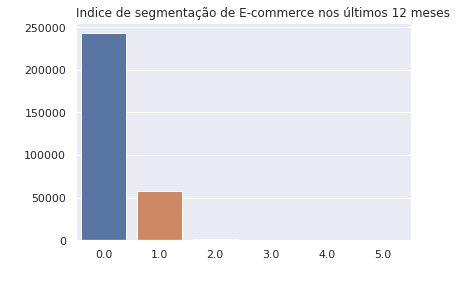


Distribution: Gaussian
Skew: Positive
Kurtosis: Leptocurtic
Mean: 0.21007899144149492
Std: 0.4434333270602802
More Info: 
		""A informação foi selecionada como indicativo de segmentação de e-commerce.""



In [569]:
why = '\n\t\t""A informação foi selecionada como indicativo de segmentação de e-commerce.""\n'
plot(df, 'countplot', "SEGMENTACAOECOM", title=description('SEGMENTACAOECOM'), y_axis_name=' ', x_axis_name=' ', info=('SEGMENTACAOECOM', 0,0,2,why), show_info=True) 

## Univariate - Variável 15

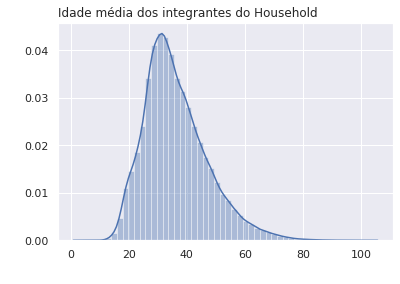


Distribution: Gaussian
Skew: Positive
Kurtosis: Leptocurtic
Mean: 36.211859312766016
Std: 10.921494420855883
More Info: 
		""A informação foi selecionada como indicativo de idade do household e a propensão de não ter um emprego.""



In [570]:
why = '\n\t\t""A informação foi selecionada como indicativo de idade do household e a propensão de não ter um emprego.""\n'
plot(df, 'distplot', "MEDIAIDADECASA", title=description('MEDIAIDADECASA'), y_axis_name=' ', x_axis_name=' ', info=('MEDIAIDADECASA', 0,0,2,why), show_info=True) 

## Univariate - Variável 16

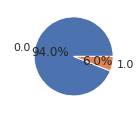

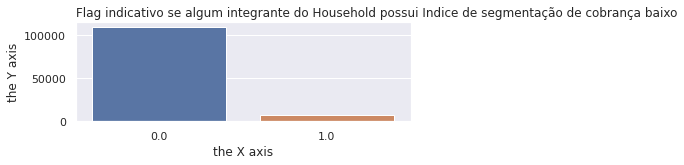


Distribution: Gaussian
Skew: Positive
Kurtosis: Leptocurtic
Mean: 0.06038570157787009
Std: 0.2382010886835263
More Info: 
		""A informação foi selecionada como um indício se o CPF household possuí segmentação de cobrança baixa.""



In [571]:
why = '\n\t\t""A informação foi selecionada como um indício se o CPF household possuí segmentação de cobrança baixa.""\n'
plot(df, 'pizza', 'COBRANCABAIXOCASA', is_subplot=True, subplot_index=(2,1,1), y_axis_name=' ', x_axis_name=' ') 
plot(df, 'countplot', 'COBRANCABAIXOCASA', title=description('COBRANCABAIXOCASA'), is_subplot=True, subplot_index=(2,1,2), final_subplot=True, info=('COBRANCABAIXOCASA', 0,0,2,why), show_info=True)

## Univariate - Variável 17

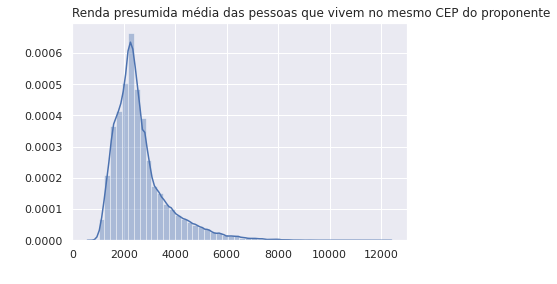


Distribution: Gaussian
Skew: Positive
Kurtosis: Leptocurtic
Mean: 2634.9950051969286
Std: 1076.0975220267758
More Info: 
		""A informação foi selecionada como indicativo de renda média por CEP.""



In [572]:
why = '\n\t\t""A informação foi selecionada como indicativo de renda média por CEP.""\n'
plot(df, 'distplot', "MEDIARENDACEP", title=description('MEDIARENDACEP'), y_axis_name=' ', x_axis_name=' ', info=('MEDIARENDACEP', 0,0,2,why), show_info=True) 

## Univariate - Variável 18

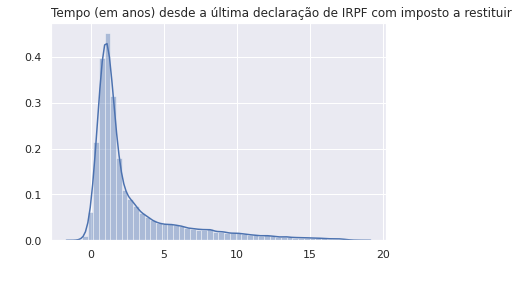


Distribution: Gaussian
Skew: Positive
Kurtosis: Leptocurtic
Mean: 2.8719666854934145
Std: 3.2540142103996
More Info: 
		""A informação foi selecionada como indicativo de anos até última restitução.""



In [573]:
why = '\n\t\t""A informação foi selecionada como indicativo de anos até última restitução.""\n'
plot(df, 'distplot', "ANOSULTIMARESTITUICAO", title=description('ANOSULTIMARESTITUICAO'), y_axis_name=' ', x_axis_name=' ', info=('ANOSULTIMARESTITUICAO', 0,0,2,why), show_info=True) 

## Univariate - Variável 19

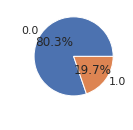

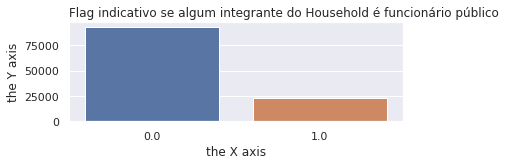


Distribution: Gaussian
Skew: Positive
Kurtosis: Leptocurtic
Mean: 0.19743671678656868
Std: 0.3980663614869503
More Info: 
		""A informação foi selecionada como um indício se uma casa possuí funcionário público.""



In [574]:
why = '\n\t\t""A informação foi selecionada como um indício se uma casa possuí funcionário público.""\n'
plot(df, 'pizza', 'FUNCIONARIOPUBLICOCASA', is_subplot=True, subplot_index=(2,1,1), y_axis_name=' ', x_axis_name=' ') 
plot(df, 'countplot', 'FUNCIONARIOPUBLICOCASA', title=description('FUNCIONARIOPUBLICOCASA'), is_subplot=True, subplot_index=(2,1,2), final_subplot=True, info=('FUNCIONARIOPUBLICOCASA', 0,0,2,why), show_info=True)

## Univariate - Variável 20

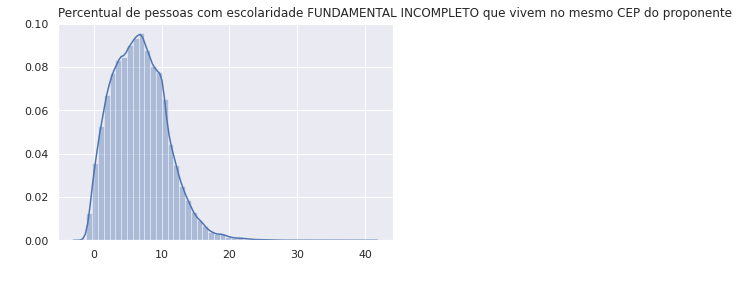


Distribution: Gaussian
Skew: Positive
Kurtosis: Leptocurtic
Mean: 6.750432806991888
Std: 4.0113788513812185
More Info: 
		""A informação foi selecionada como indicativo de pessoas com o ensino fundamental incompleto.""



In [606]:
why = '\n\t\t""A informação foi selecionada como indicativo de pessoas com o ensino fundamental incompleto.""\n'
plot(df, 'distplot', "PERCENTFUNDAMENTALCEP", title=description('PERCENTFUNDAMENTALCEP'), y_axis_name=' ', x_axis_name=' ', info=('PERCENTFUNDAMENTALCEP', 0,0,2,why), show_info=True) 

# Multivariate data analysis

In this section, you should plot at least 8 multivariate visualizations. The key here is to investigate underlying correlations and behaviors in the dataset.
Naturally, as visualizations are being created, we should end up with obvious results, yet, you should find at least **TWO** non-obvious behavior in data.

Please follow these steps for creating your visualizations:
1. State an hypothesis. The key here is to explain why you are choosing those specific variables together and what you are expecting to find.
2. Determine what kind of visualization is the most suited.
3. Report the findings and whether they corroborate or not the aforestated hypothesis.


### Hints

In this section, make sure you go beyond naive explorations. For instance, try PCA, t-SNE, and even other techniques we have not worked with during the lectures. The key here is to start to develop a critical mindset towards data analysis and our own work.

### Important

It is strictly forbidden to create multivariate visualizations using variables that were not used in the previous section (univariate analysis).

In [576]:
# again, feel free to place as many cells to plot the visualizations, 
# as well as describe to the main findings

## Multivariate - Analysis 1


Hipótese: Quanto maior a idade média de uma casa, maior a renda média.




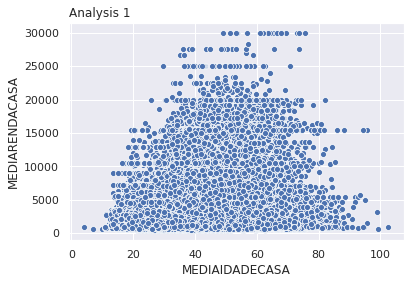


Resultado: Os resultados favorecem a hipótese.



In [577]:
print("\nHipótese: Quanto maior a idade média de uma casa, maior a renda média.")
plot(df, "scatterplot", "MEDIAIDADECASA", 'MEDIARENDACASA', x_axis_name='MEDIAIDADECASA', y_axis_name='MEDIARENDACASA', title="Analysis 1")
print("\nResultado: Os resultados favorecem a hipótese.\n")

## Multivariate - Analysis 2


Hipótese: Quanto maior a média renda do CEP, menor o índice de inconclusão do ensino fundamental por CEP.




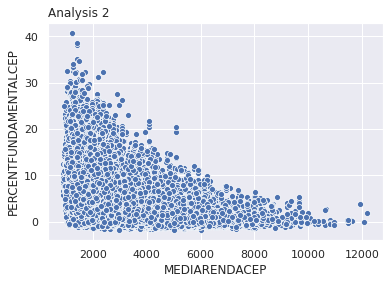


Resultado: Os resultados favorecem a hipótese.



In [578]:
print("\nHipótese: Quanto maior a média renda do CEP, menor o índice de inconclusão do ensino fundamental por CEP.")
plot(df, "scatterplot", "MEDIARENDACEP", 'PERCENTFUNDAMENTALCEP', x_axis_name='MEDIARENDACEP', y_axis_name='PERCENTFUNDAMENTALCEP', title='Analysis 2')
print("\nResultado: Os resultados favorecem a hipótese.\n")

## Multivariate - Analysis 3


Hipótese: Quanto mais tempo o CPF está cadastrado, mais tempo desde a última restituição.




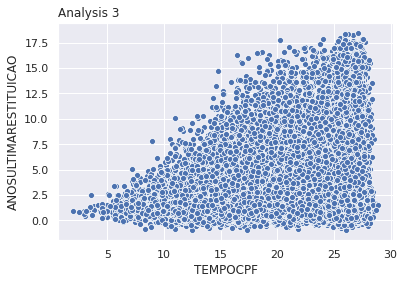


Resultado: Os resultados favorecem a hipótese.



In [579]:
print("\nHipótese: Quanto mais tempo o CPF está cadastrado, mais tempo desde a última restituição.")
plot(df, "scatterplot", "TEMPOCPF", 'ANOSULTIMARESTITUICAO', x_axis_name='TEMPOCPF', y_axis_name='ANOSULTIMARESTITUICAO', title='Analysis 3')
print("\nResultado: Os resultados favorecem a hipótese.\n")

## Multivariate - Analysis 4


Hipótese: Quem não é inadimplente(1.0), em tese, restitui seus impostos com maior frequência.




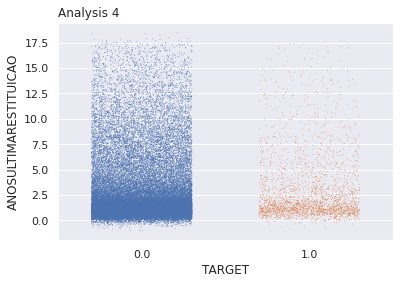


Resultado: Os resultados favorecem a hipótese(Resultado não óbvio).



In [580]:
print("\nHipótese: Quem não é inadimplente(1.0), em tese, restitui seus impostos com maior frequência.")
plot(df, "stripplot", "TARGET", 'ANOSULTIMARESTITUICAO', x_axis_name='TARGET', y_axis_name='ANOSULTIMARESTITUICAO', title='Analysis 4', options=[0.3, 0.8])
print("\nResultado: Os resultados favorecem a hipótese(Resultado não óbvio).\n")

## Multivariate - Analysis 5


Hipótese: Quem não é inadimplente, está localizado em um CEP com mais pessoas com ensino fundamental completo.




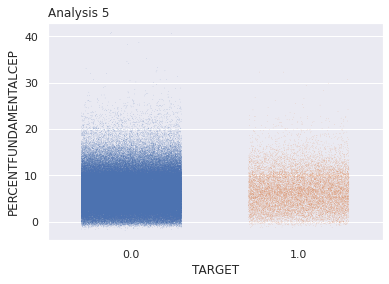


Resultado: Os resultados não favorecem muito a hipótese.



In [581]:
print("\nHipótese: Quem não é inadimplente, está localizado em um CEP com mais pessoas com ensino fundamental completo.")
plot(df, "stripplot",'TARGET', 'PERCENTFUNDAMENTALCEP', x_axis_name='TARGET', y_axis_name='PERCENTFUNDAMENTALCEP', title='Analysis 5', options=[0.3, 0.4])
print("\nResultado: Os resultados não favorecem muito a hipótese.\n")

## Multivariate - Analysis 6


Hipótese: Famílias mais novas tendem a utilizar-se do Bolsa Família.




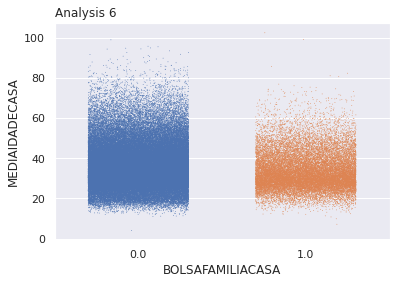


Resultado: Os resultados favorecem a hipótese.



In [582]:
print("\nHipótese: Famílias mais novas tendem a utilizar-se do Bolsa Família.")
plot(df, "stripplot", "BOLSAFAMILIACASA", 'MEDIAIDADECASA', x_axis_name='BOLSAFAMILIACASA', y_axis_name='MEDIAIDADECASA', title='Analysis 6', options=[0.3, 0.8])
print("\nResultado: Os resultados favorecem a hipótese.\n")

## Multivariate - Analysis 7


Hipótese: Sócios de empresas tendem a morar mais próximos aos centros de suas cidades.




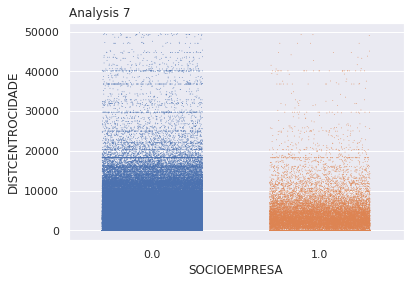


Resultado: Os resultados favorecem a hipótese.



In [583]:
print("\nHipótese: Sócios de empresas tendem a morar mais próximos aos centros de suas cidades.")
plot(df, 'stripplot', "SOCIOEMPRESA", 'DISTCENTROCIDADE', x_axis_name='SOCIOEMPRESA', y_axis_name='DISTCENTROCIDADE', title='Analysis 7', options=[0.3, 0.8])
print("\nResultado: Os resultados favorecem a hipótese.\n")

## Multivariate - Analysis 8


Hipótese: Quanto mais próximo do centro da cidade, maiores os gastos com o aluguel, logo maior deve ser a renda média.




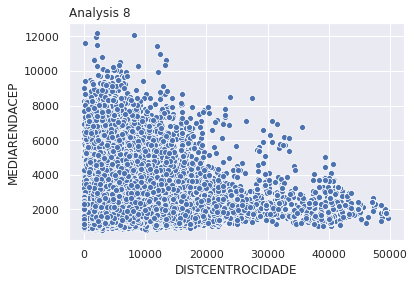


Resultado: Os resultados favorecem a hipótese(Resultado não óbvio).



In [584]:
print("\nHipótese: Quanto mais próximo do centro da cidade, maiores os gastos com o aluguel, logo maior deve ser a renda média.")
plot(df, 'scatterplot', "DISTCENTROCIDADE", 'MEDIARENDACEP', x_axis_name='DISTCENTROCIDADE', y_axis_name='MEDIARENDACEP', title='Analysis 8', options=[0.3, 0.8])
print("\nResultado: Os resultados favorecem a hipótese(Resultado não óbvio).\n")

# Final Plots

In this section, you need to enhance 3 multivariate visualizations that were presented in the previous section of the report.
The key here is to enhance these visualizations with the goal of presenting them for an audience that is not familiar with the dataset used or with data analysis.
**Therefore, make sure that its size, colors, textures, etc, are appropriate are convey the right information to the audience.**

For your final plots, make sure you follow these steps:
1. Present the plot
2. Provide a description of the visualization, including the main findings that we can extract from it


**Hint: take a look at the checklist also made available based on the work of Evergreen.**

In [585]:
# your code goes here


Hipótese: Quanto maior a média renda do CEP, menor o índice de inconclusão do ensino fundamental por CEP.




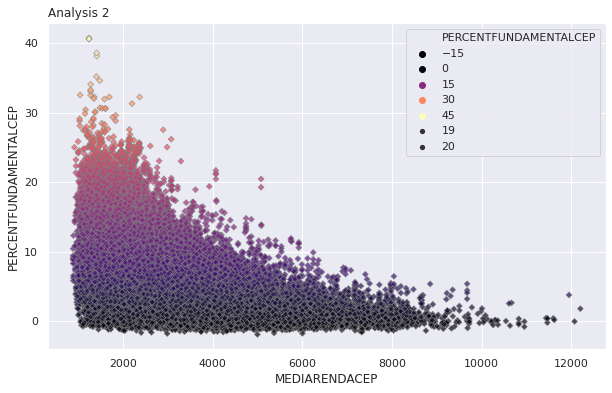


Resultado: Os resultados favorecem a hipótese.



In [586]:
# A2
print("\nHipótese: Quanto maior a média renda do CEP, menor o índice de inconclusão do ensino fundamental por CEP.")
plot(df, "scatterplot_f", "MEDIARENDACEP", 'PERCENTFUNDAMENTALCEP',x_axis_name='MEDIARENDACEP', y_axis_name='PERCENTFUNDAMENTALCEP', title='Analysis 2', define_size=True, sizeP=(10,6))
print("\nResultado: Os resultados favorecem a hipótese.\n")


Hipótese: Quem não é inadimplente(1.0), em tese, restitui seus impostos com maior frequência.




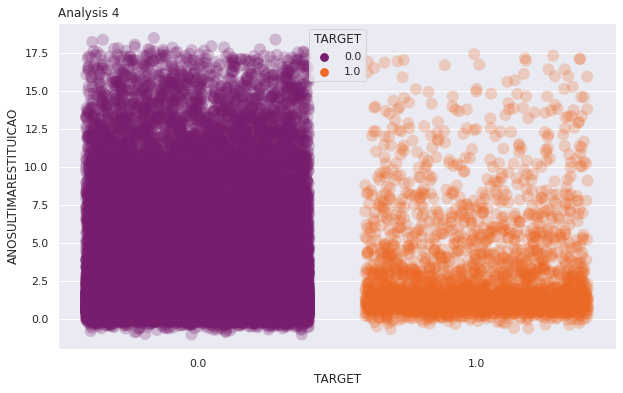


Resultado: Os resultados favorecem a hipótese(Resultado não óbvio).



In [587]:
# A4
print("\nHipótese: Quem não é inadimplente(1.0), em tese, restitui seus impostos com maior frequência.")
plot(df, "stripplot_f", "TARGET", 'ANOSULTIMARESTITUICAO', x_axis_name='TARGET', y_axis_name='ANOSULTIMARESTITUICAO', title='Analysis 4', define_size=True, sizeP=(10,6))
print("\nResultado: Os resultados favorecem a hipótese(Resultado não óbvio).\n")


Hipótese: Quanto mais próximo do centro da cidade, maiores os gastos com o aluguel, logo maior deve ser a renda média.




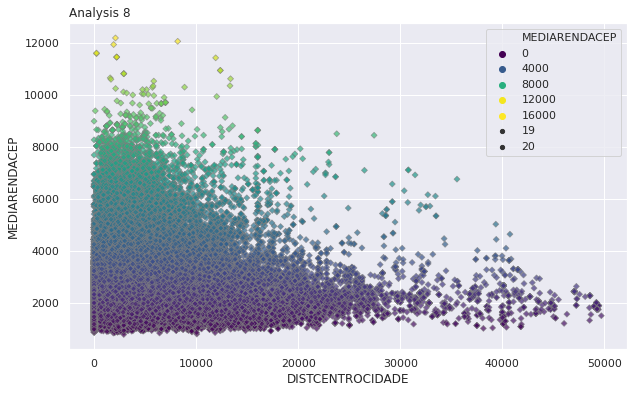


Resultado: Os resultados favorecem a hipótese(Resultado não óbvio).



In [605]:
# A8
print("\nHipótese: Quanto mais próximo do centro da cidade, maiores os gastos com o aluguel, logo maior deve ser a renda média.")
plot(df, 'scatterplot_f2', "DISTCENTROCIDADE", 'MEDIARENDACEP', x_axis_name='DISTCENTROCIDADE', y_axis_name='MEDIARENDACEP', title='Analysis 8', define_size=True, sizeP=(10,6))
print("\nResultado: Os resultados favorecem a hipótese(Resultado não óbvio).\n")

# Digest

In this section you should write down all the main findings of this exploratory data analysis. Furthermore, you should provide a reflection about your own work and effort during the module, highlighting what you believe you have done well and what you should have done differently. This digest should have at least 2500 characters (no spaces).

```
Add your text here.
```

# Machine Learning

In this section, you should test different machine learning approaches to **build** and **evaluate** your model.

**IMPORTANT: DO NOT FORGET TO REPORT YOUR PREDICTIONS FOR THE TEST DATA. YOU SHOULD BUILD AND EXPORT A FILE ACCORDING TO THE PROJECT DESCRIPTION WITH THE DEFAULTING PROBABILITIES!**

In [589]:
# use as many cells as you wish.

In [590]:
# but the sure that all cells are commented adequately!

# Future work

In this cell, please provide at least 3 different ideas that you would like to pursuit within this dataset. That may include, for example, the use of machine learning techniques towards a goal, or analyzing variables that you had no time to during this work. 
Please provide **details** on how you would tackle this problem and provide specifics on which techniques should be used for such purposes.
This section should contain, at least, 2500 characters (no spaces).

```
Add your text here.
```


# Final Steps


1. Save this report as a jupyter notebook (`.ipynb`)
2. Save a copy of this report as a PDF file (`.pdf`)
3. Copy the dataset
4. Zip it all together within a single file (`<your_name>.zip`)
5. Send it over using Blackboard.